# Amazon Deep Learning Container

* Container Images List [link](https://github.com/aws/deep-learning-containers/blob/master/available_images.md)
* pytorch training: `763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.5.1-gpu-py36-cu101-ubuntu16.04`

# Download the pretrained yolov5s network

In [1]:
fp_yolo_cfg = './container/local_test/test_dir/input/data/cfg/yolov5s.yaml'

In [2]:
!wget 'https://raw.githubusercontent.com/ultralytics/yolov5/master/models/yolov5s.yaml' -O {fp_yolo_cfg}

--2020-07-24 11:46:00--  https://raw.githubusercontent.com/ultralytics/yolov5/master/models/yolov5s.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1414 (1.4K) [text/plain]
Saving to: ‘./container/local_test/test_dir/input/data/cfg/yolov5s.yaml’

./container/local_t 100%[===================>]   1.38K  --.-KB/s    in 0s      

2020-07-24 11:46:00 (20.7 MB/s) - ‘./container/local_test/test_dir/input/data/cfg/yolov5s.yaml’ saved [1414/1414]



In [3]:
!cat {fp_yolo_cfg}

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

# Download the pretrained model

In [4]:
gfid_yolov5s = '1R5T6rIyy3lLwgFXNms8whc-387H0tMQO'
fp_out = './container/local_test/test_dir/input/data/weights/yolov5s.pt'

In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={gfid_yolov5s}' -O {fp_out}

--2020-07-24 11:46:08--  https://docs.google.com/uc?export=download&id=1R5T6rIyy3lLwgFXNms8whc-387H0tMQO
Resolving docs.google.com (docs.google.com)... 172.217.14.206, 2607:f8b0:400a:804::200e
Connecting to docs.google.com (docs.google.com)|172.217.14.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cjaunvege1qesqfb63cho92g2escasp8/1595591100000/18003229793517042864/*/1R5T6rIyy3lLwgFXNms8whc-387H0tMQO?e=download [following]
--2020-07-24 11:46:08--  https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cjaunvege1qesqfb63cho92g2escasp8/1595591100000/18003229793517042864/*/1R5T6rIyy3lLwgFXNms8whc-387H0tMQO?e=download
Resolving doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.googleusercontent.com)... 172.217.3.193, 2607:f8b0:400a:801::2001
Connecting to doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.google

# Build container and run local test in terminal

* open new terminal

```
bash
cd /home/ec2-user/SageMaker/myAWSStudyBlog/yolov5-onnx-sm/3-yolov5-sm-container
./build-and-push.sh yolov5
```

In [ ]:
! ./build-and-push.sh yolov5

# Run the local serv test container

Following the commands:
```
cd /home/ec2-user/SageMaker/myAWSStudyBlog/yolov5-onnx-sm/3-yolov5-sm-container/container/local_test
predict_local.sh yolov5
```

You will see the output at `test_dir/input/data/images/inference/output/`

## Change directory to 'container/local_test'

In [8]:
%cd container/local_test

/home/ec2-user/SageMaker/need-to-fixed/yolov5-onnx-sm/5-yolov5-sm-container/container/local_test


In [9]:
!./predict_local.sh yolov5

bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/opt/ml/input/data/weights/yolov5s.pt
/opt/ml/input/data/images/inference
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/opt/ml/input/data/images/inference', update=False, view_img=False, weights=['/opt/ml/input/data/weights/yolov5s.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
image 1/2 /opt/ml/input/data/images/inference/bus.jpg: 640x512 4 persons, 1 buss, Done. (0.379s)
image 2/2 /opt/ml/input/data/images/inference/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.138s)
Results saved to /opt/code/inference/output
Done. (0.596s)


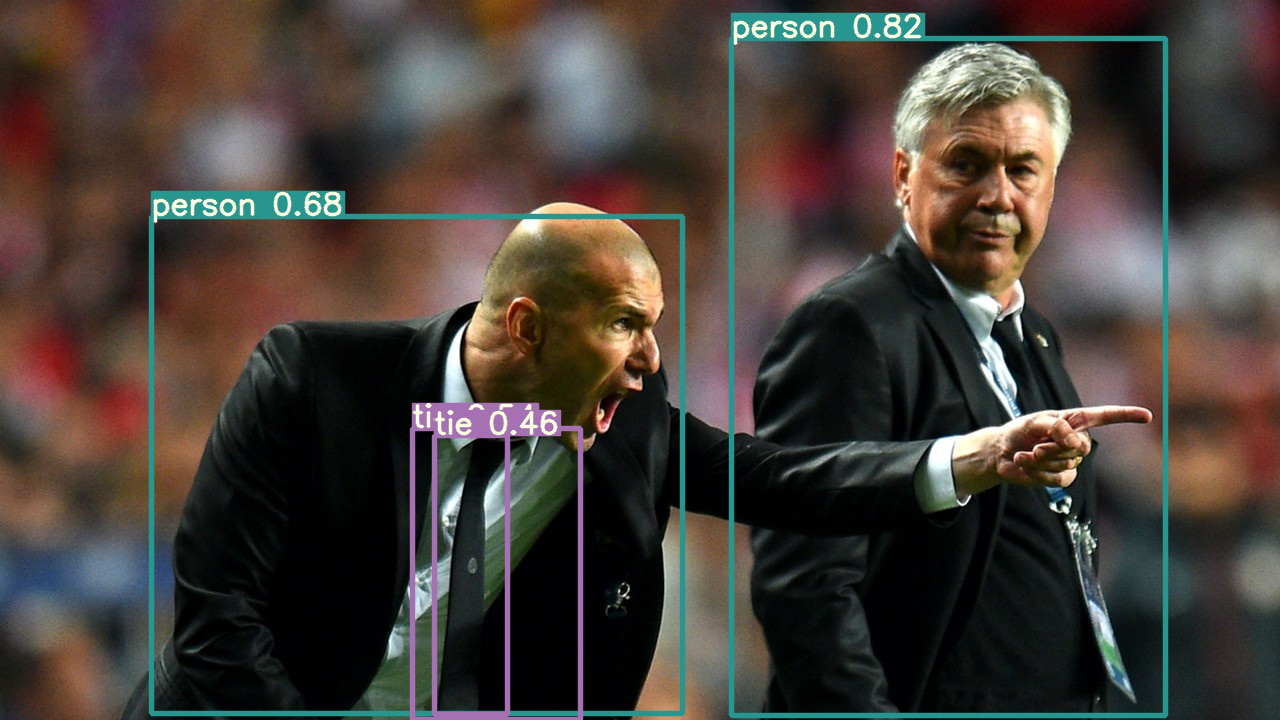

In [10]:
from PIL import Image

fp_img_out = './test_dir/input/data/images/inference/output/zidane.jpg'
img = Image.open(fp_img_out)
display(img)

# Local Training

In [ ]:
!./train_local.sh yolov5

# Train on SageMaker Host

In [12]:
# push test_data into s3 bucket
import boto3
region = boto3.session.Session().region_name
bucket = 'beyoung-sm-yolo5-20200724'
!aws s3api create-bucket --bucket {bucket} --create-bucket-configuration LocationConstraint={region}

{
    "Location": "http://beyoung-sm-yolo5-20200724.s3.amazonaws.com/"
}


In [14]:
%cd ../..

/home/ec2-user/SageMaker/need-to-fixed/yolov5-onnx-sm/5-yolov5-sm-container


In [ ]:
!aws s3 cp --recursive container/local_test/test_dir/ s3://{bucket}

In [16]:
# ECR URI
account=boto3.client('sts').get_caller_identity().get('Account')
repositoryUri="{}.dkr.ecr.{}.amazonaws.com/yolov5".format(account, region)
repositoryUri

'476271697919.dkr.ecr.us-west-2.amazonaws.com/yolov5'

In [17]:
from datetime import datetime
now = datetime.now()
job_name = 'yolov5-' + now.strftime("%Y-%m-%d-%H-%M-%S")
job_name

'yolov5-2020-07-24-11-57-09'

In [18]:
# cfg  images weights labels
cfg='s3://{}/input/data/cfg/'.format(bucket)
images='s3://{}/input/data/images/'.format(bucket)
weights='s3://{}/input/data/weights/'.format(bucket)
labels='s3://{}/input/data/labels/'.format(bucket)
outpath='s3://{}/results/'.format(bucket)

In [19]:
import sagemaker
from sagemaker import get_execution_role
role = get_execution_role()
sm = boto3.client('sagemaker')

In [20]:
response = sm.create_training_job(
      TrainingJobName=job_name,
      AlgorithmSpecification={
          'TrainingImage': repositoryUri,
          'TrainingInputMode': 'File',
      },
      RoleArn=role,
      InputDataConfig=[
          {
              'ChannelName': 'cfg',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',
                      'S3Uri': cfg,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'images',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': images,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'labels',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': labels,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          },
          {
              'ChannelName': 'weights',
              'DataSource': {
                  'S3DataSource': {
                      'S3DataType': 'S3Prefix',                      
                      'S3Uri': weights,
                      'S3DataDistributionType': 'FullyReplicated',
                  },
              },
              'InputMode': 'File'
          }
      ],
      OutputDataConfig={
          'S3OutputPath': outpath
      },
      ResourceConfig={
          'InstanceType': 'ml.p3.2xlarge',
          'InstanceCount': 1,
          'VolumeSizeInGB': 10,
      },
      StoppingCondition={
        'MaxRuntimeInSeconds': 60*60*5,
      }
  )
response

{'TrainingJobArn': 'arn:aws:sagemaker:us-west-2:476271697919:training-job/yolov5-2020-07-24-11-57-09',
 'ResponseMetadata': {'RequestId': '66de8055-2299-4e89-ba8f-b6d107dff585',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '66de8055-2299-4e89-ba8f-b6d107dff585',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '101',
   'date': 'Fri, 24 Jul 2020 11:57:30 GMT'},
  'RetryAttempts': 0}}

### Go to SageMaker and see the training job

## Reference and working notes

#### harmless error about hostname

* checkout the issue143 [link](https://github.com/aws/sagemaker-pytorch-training-toolkit/issues/143)

In [ ]:
docker run -v $(pwd)/test_dir:/opt/ml -it --rm yolov5 bash
nvidia-docker run -v $(pwd)/test_dir:/opt/ml --rm ${image} train

In [ ]:
python /opt/yolov5/train.py --img 640 --batch 16 --epochs 5 --data /opt/ml/input/data/cfg/coco128.yaml \
--cfg /opt/ml/input/data/cfg/yolov5s.yaml --weights /opt/ml/input/data/weights/yolov5s.pt

In [ ]:
## log directory, use tensorboard
tb_writer = SummaryWriter(log_dir=increment_dir('runs/exp', opt.name))

def increment_dir(dir, comment=''):
    # Increments a directory runs/exp1 --> runs/exp2_comment
    n = 0  # number
    dir = str(Path(dir))  # os-agnostic
    d = sorted(glob.glob(dir + '*'))  # directories
    if len(d):
        n = max([int(x[len(dir):x.find('_') if '_' in x else None]) for x in d]) + 1  # increment
    return dir + str(n) + ('_' + comment if comment else '')